In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, Ridge
import joblib

In [6]:
df = pd.read_csv('bodyfat.csv')

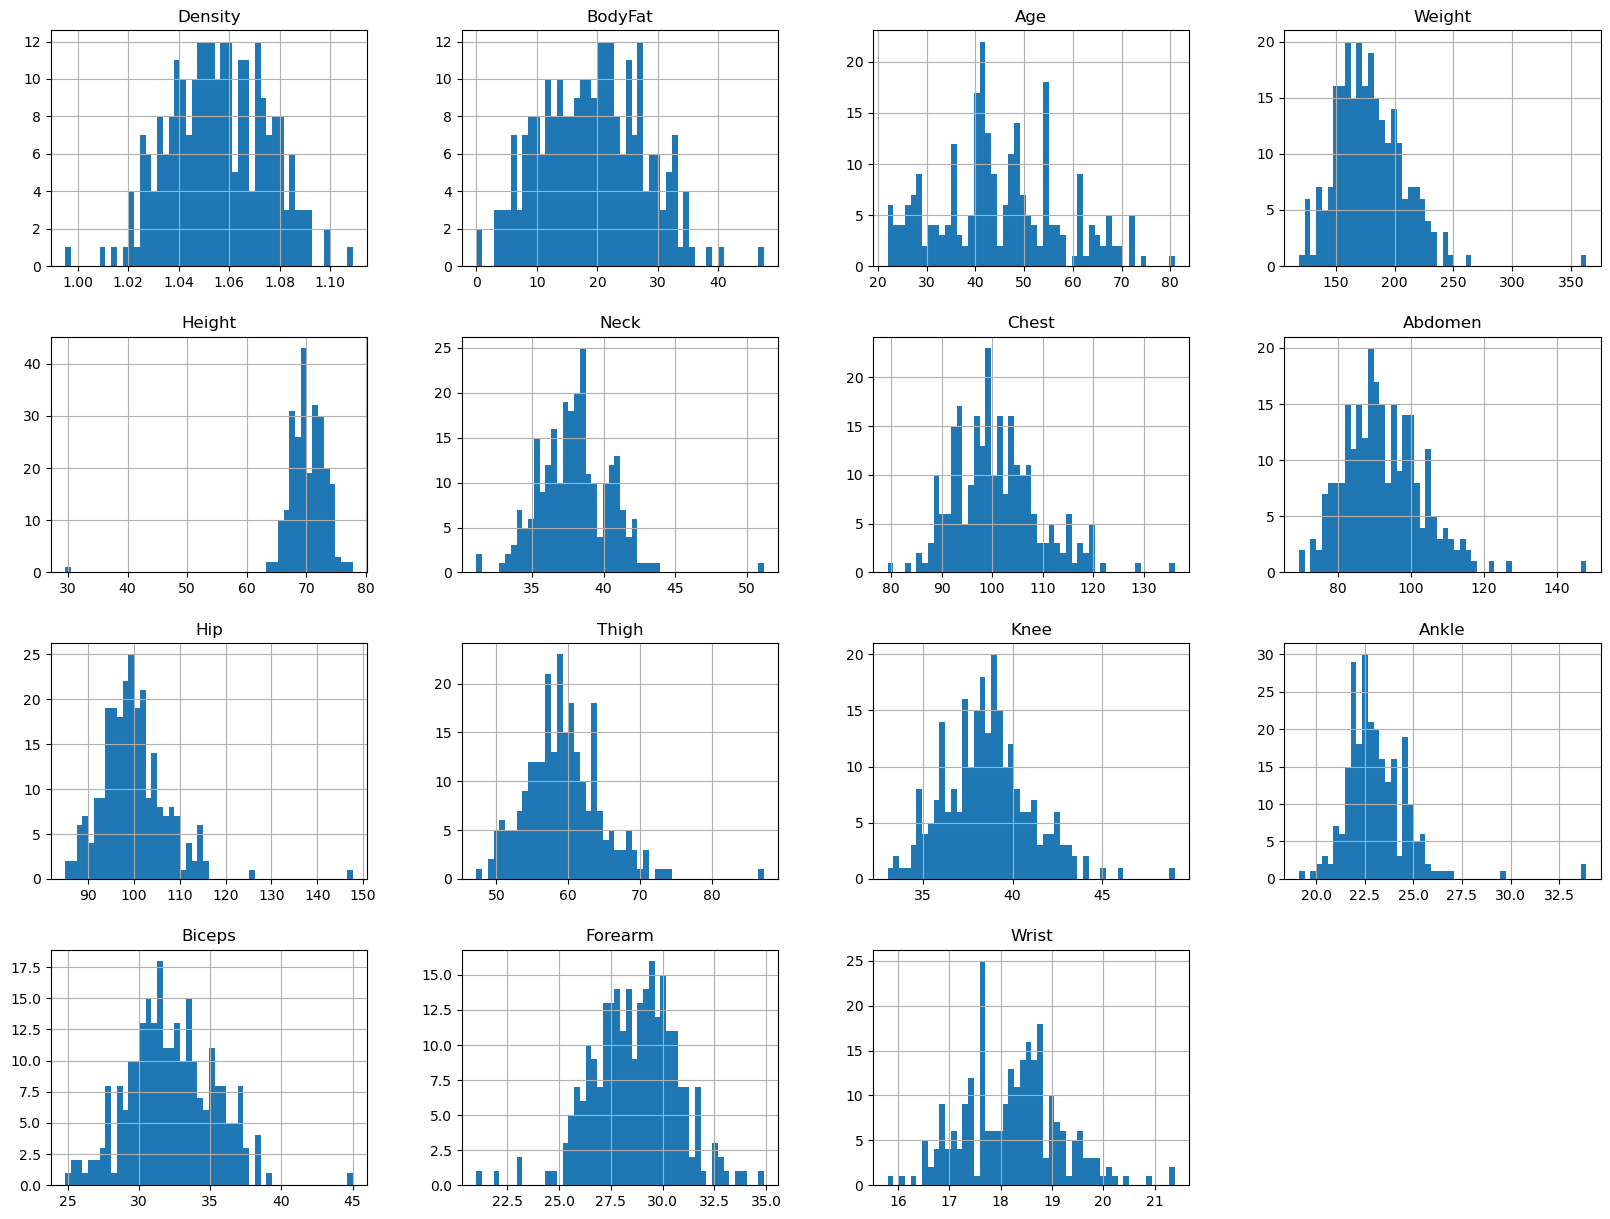

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

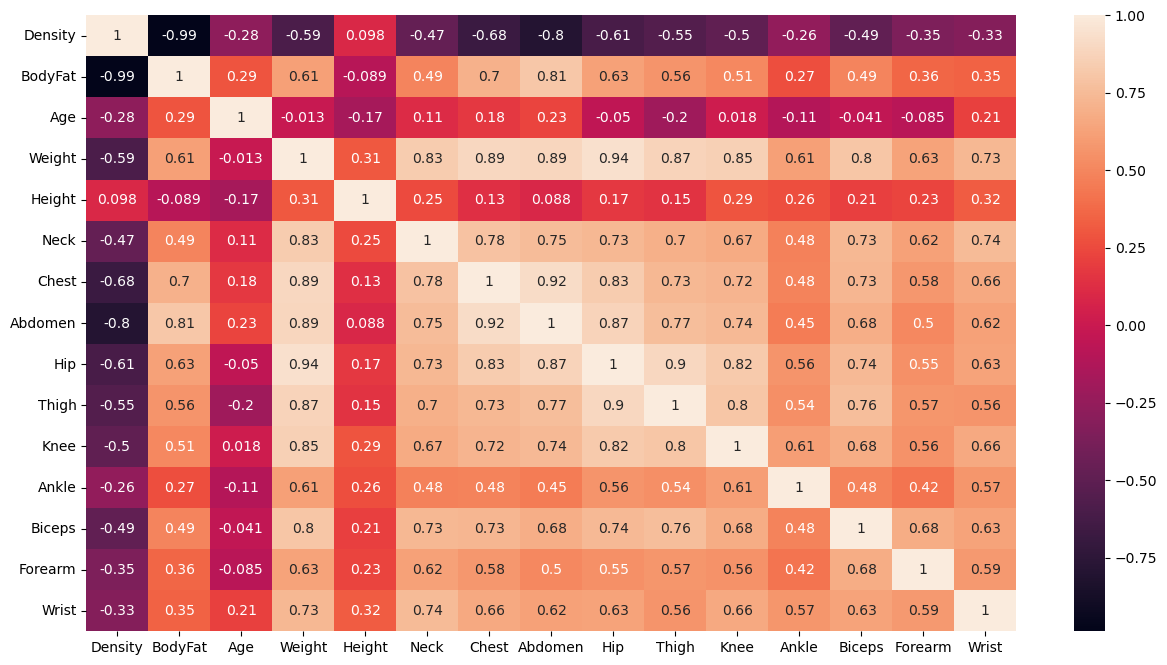

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [25]:
data_train,data_test,pred_train,pred_test = train_test_split(df.drop(columns=['BodyFat','Density','Hip']),df['BodyFat'],test_size= 0.3,random_state= 0)

In [20]:
regresion_tree = DecisionTreeRegressor(max_depth = 3)
regresion_tree.fit(data_train,pred_train)

DecisionTreeRegressor(max_depth=3)

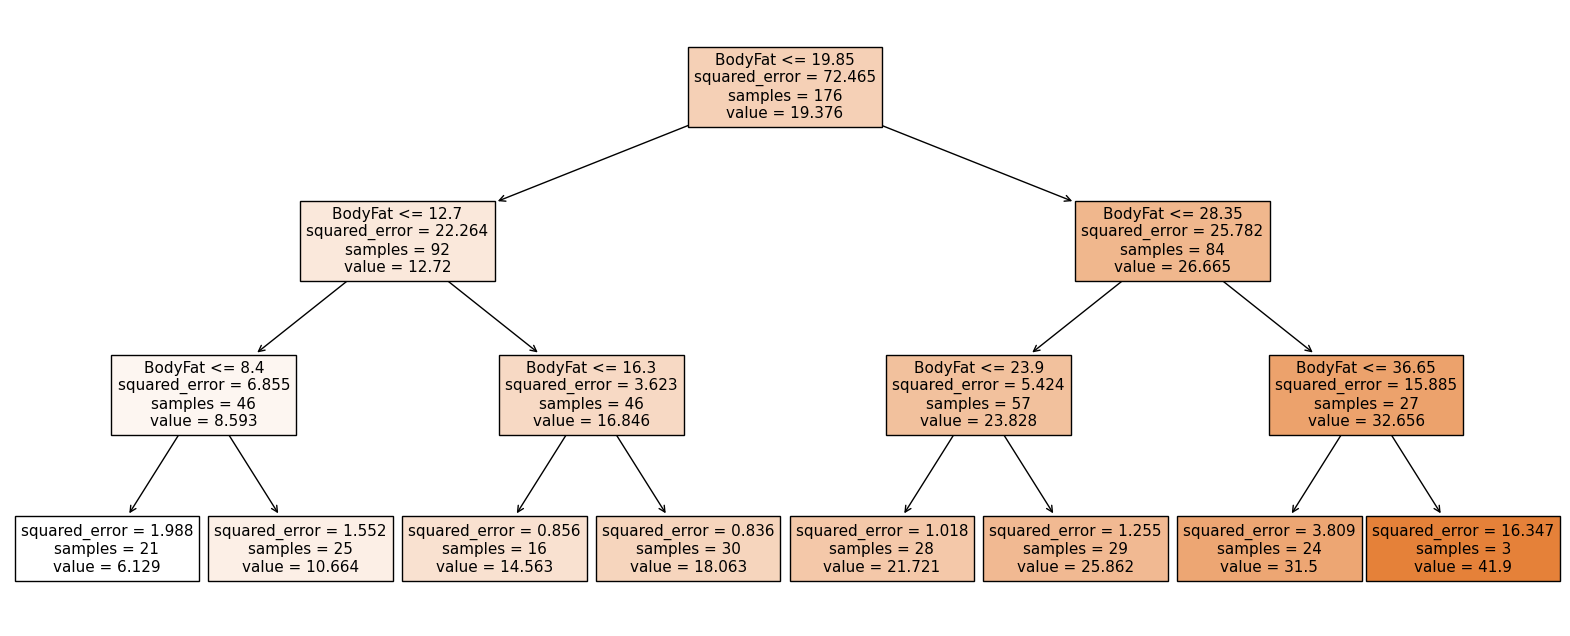

In [21]:
fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(regresion_tree, feature_names=list(data_train.columns), filled=True)

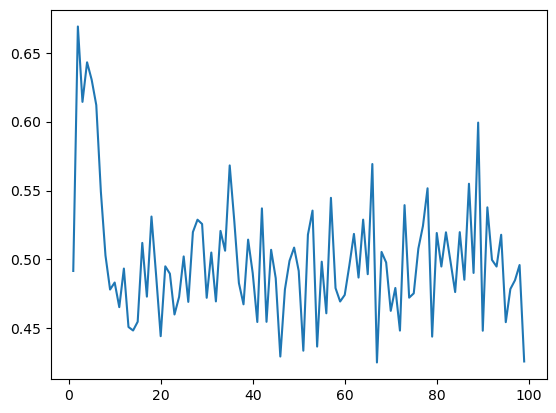

In [26]:
x = []
y = []
for i in range(1,100):
    regresion_tree = DecisionTreeRegressor(max_depth = i)
    regresion_tree.fit(data_train,pred_train)
    x.append(i)
    y.append(regresion_tree.score(data_test,pred_test))
plt.plot(x,y)


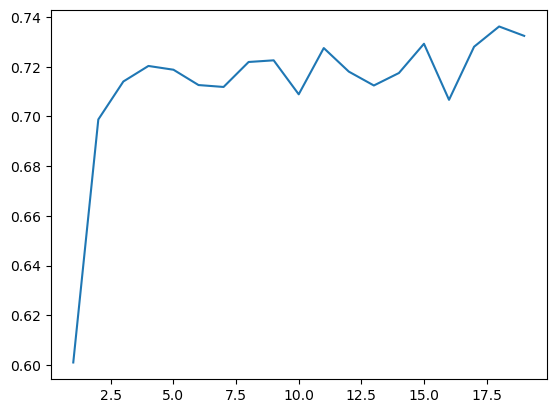

In [27]:
x = []
y = []
for i in range(1,20):
    random_regresion_forest = RandomForestRegressor(max_depth = i, n_estimators = 80)
    random_regresion_forest.fit(data_train,pred_train)
    y.append(random_regresion_forest.score(data_test,pred_test))
    x.append(i)
plt.plot(x,y)


In [23]:
scaler = StandardScaler()
scaler.fit(data_train)
data_train_rescaled = scaler.transform(data_train)
data_test_rescaled = scaler.transform(data_test)
regresion = LinearRegression()
regresion.fit(data_train_rescaled,pred_train)
regresion.score(data_test_rescaled,pred_test)

1.0

In [15]:
data_train.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
107,52,203.25,74.25,42.0,110.0,101.6,55.8,38.7,23.4,35.1,29.6,19.1
217,51,154.50,70.00,36.9,93.3,81.5,54.7,39.0,22.6,27.5,25.9,18.6
4,24,184.25,71.25,34.4,97.3,100.0,63.2,42.2,24.0,32.2,27.7,17.7
116,48,177.25,72.75,36.8,96.0,90.0,58.8,38.4,22.8,29.9,28.0,18.1
61,56,178.75,68.50,35.6,102.9,94.7,60.9,38.0,22.1,32.5,29.8,18.3


In [16]:
fitted_data = scaler.transform([[20,158.4,70.8,38,101,94,60,34,21,35,27,16]])
regresion.predict(fitted_data)

c:\Users\adamw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([26.04391167])

In [18]:
random_regresion_forest = RandomForestRegressor(max_depth = 6, n_estimators = 80)
random_regresion_forest.fit(data_train,pred_train)
random_regresion_forest.predict([[20,158.4,70.8,38,101,94,60,34,21,35,27,16]])
joblib.dump(random_regresion_forest,'forest.sav')

c:\Users\adamw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


['forest.sav']